In [4]:
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pickle

In [7]:
data= pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X= data.drop('Outcome', axis=1)
y= data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model= LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Freddy Alvarado\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727


In [12]:
print(model.predict([[6,148,72,35,0,33.6,0.627,50]])) 
print(model.predict([[1,85,66,29,0,26.6,0.351,31]]))

[1]
[0]


c:\Users\Freddy Alvarado\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Freddy Alvarado\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


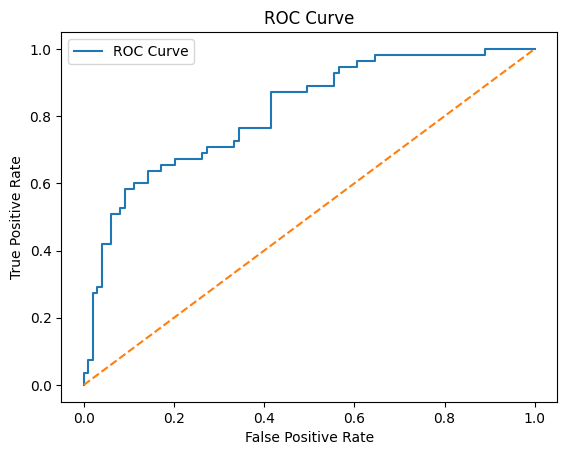

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [14]:
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

AUC-ROC: 0.8121212121212121


In [15]:

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X,y)
puntuaciones=selector.scores_
percentages = puntuaciones / puntuaciones.sum() * 100
print("Puntuaciones de las características:", percentages)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': percentages
}).sort_values(by='Importance (%)', ascending=False)

print(importance_df)

Puntuaciones de las características: [ 2.73061446 34.57074839  0.43107622  1.30037647 53.26978539  3.12604664
  0.13204246  4.43930997]
                    Feature  Importance (%)
4                   Insulin       53.269785
1                   Glucose       34.570748
7                       Age        4.439310
5                       BMI        3.126047
0               Pregnancies        2.730614
3             SkinThickness        1.300376
2             BloodPressure        0.431076
6  DiabetesPedigreeFunction        0.132042


In [17]:
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)